# Статистическая база

Чтобы начать что-то классифицировать, нужно определить понятия, связанные с центральным объектом классификации -- графиками вероятностных распределений.

Для начала стоит сказать, что распределения случайной величины делятся на дискретные и непрерывные.


## Дискретное распределение

Случайная величина называется **дискретной**, если она принимает конечное или счётное количество значений.

**Дискретное распределение случайной величины** -- это функция, устанавливающая взаимосвязь между значениями, которые принимает случайная величина и соответствующими им вероятностями, причём количество принимаемых значений конечно или счётно в силу определения дискретной величины.


### *Примеры дискретных распределений:*

#### Биномиальное распределение

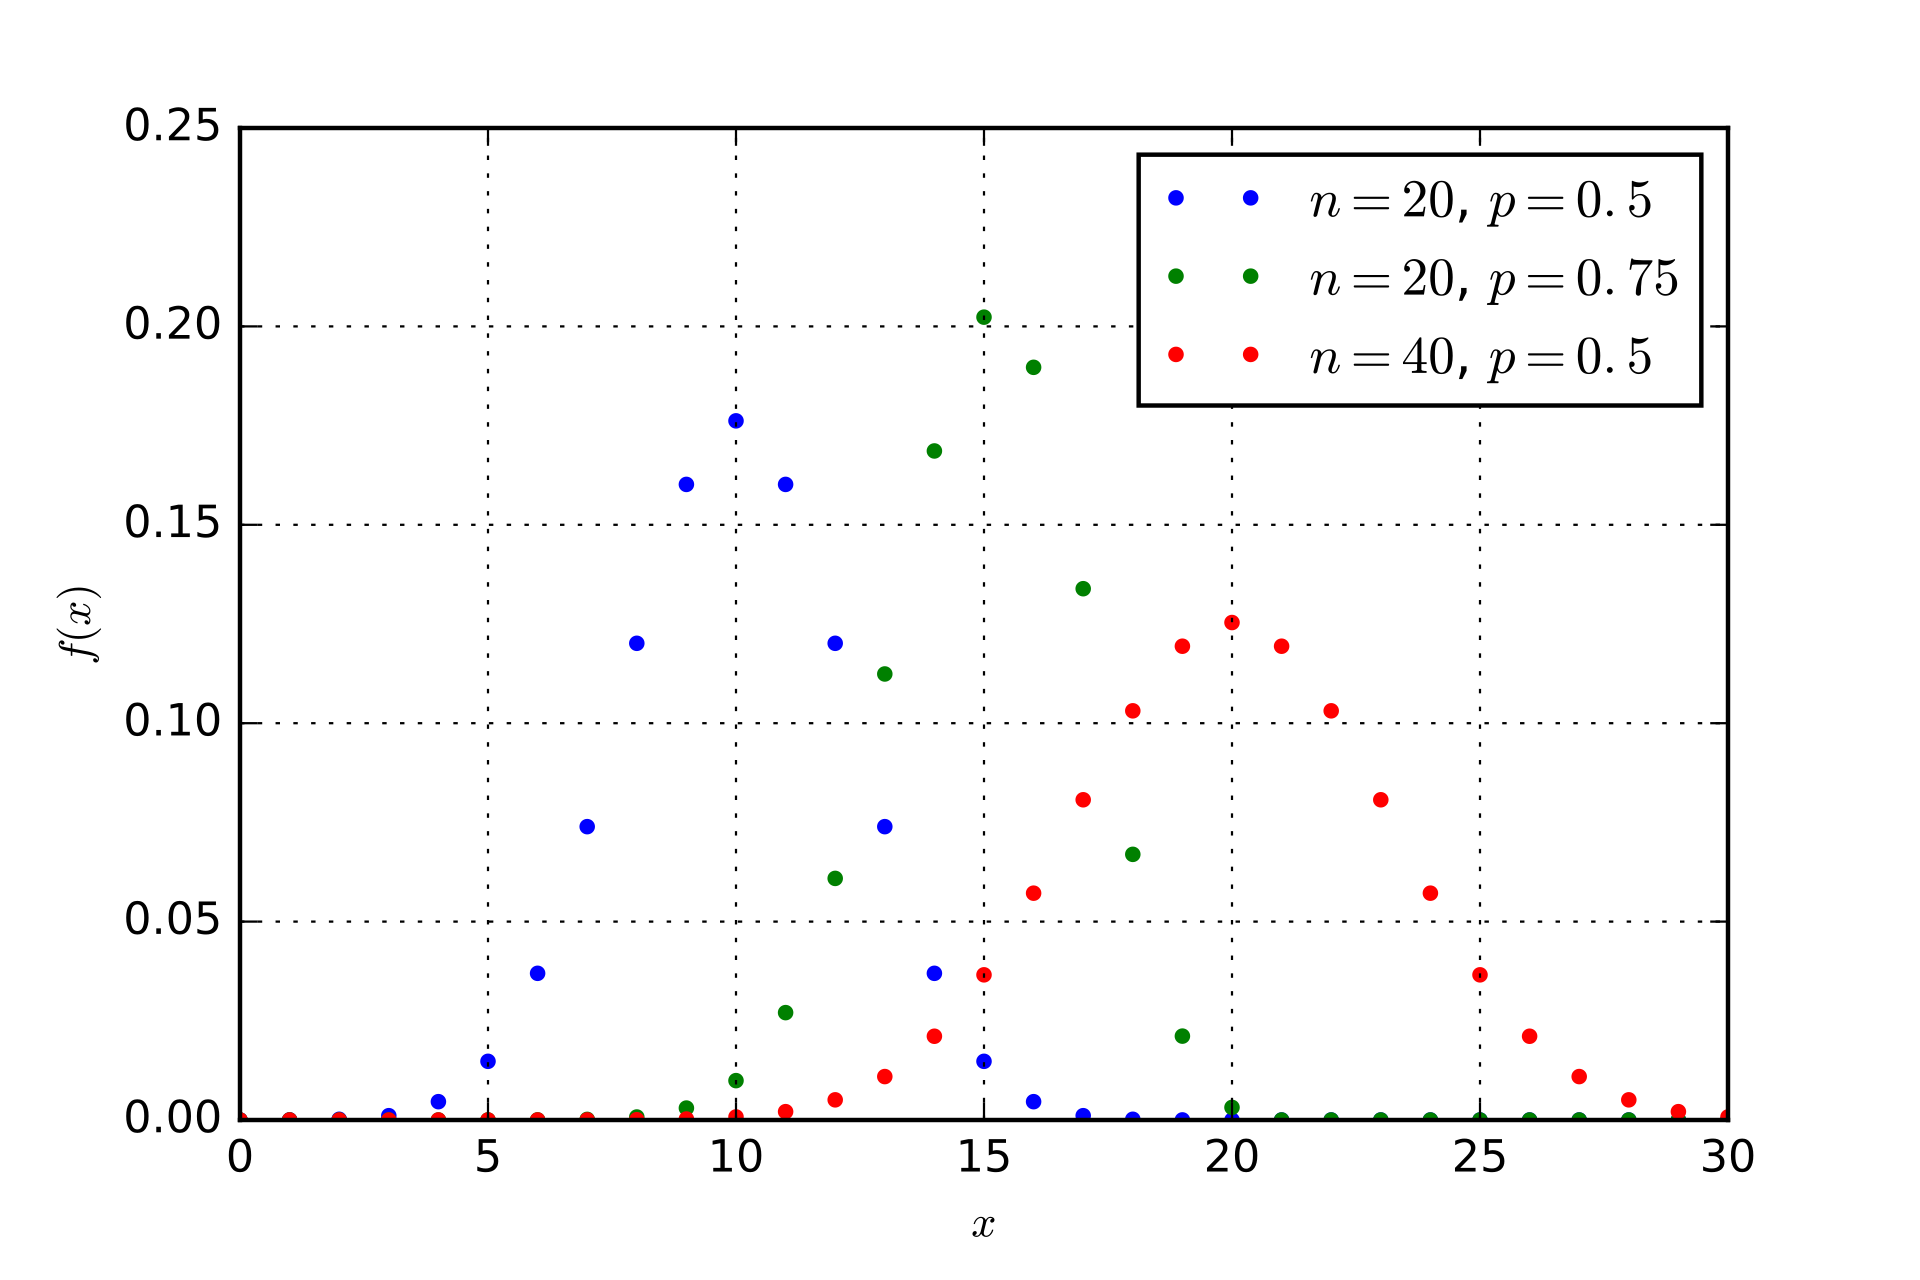

#### Геометрическое распределение

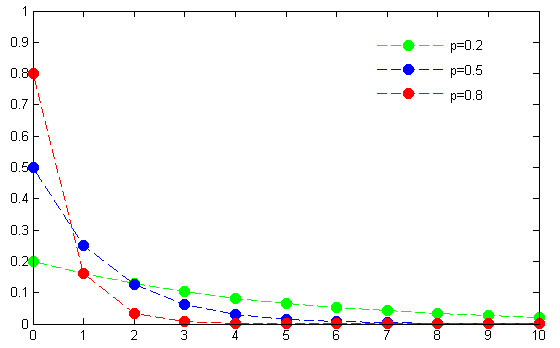

#### Распределение Пуассона

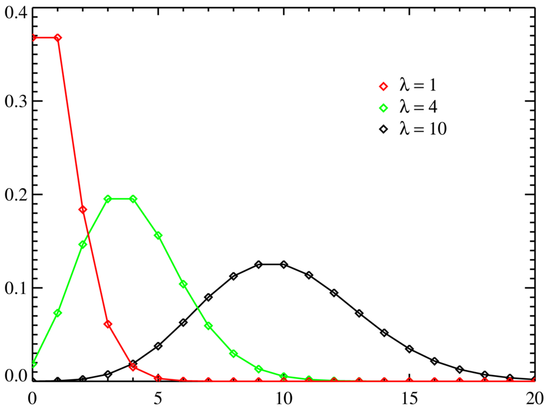

## Непрерывное распределение

Случайная величина называется **непрерывной**, если она принимает несчётное множество значений.

**Непрерывное распределение случайной величины** -- это абсолютно непрерывная функция случайной величины, имеющей несчётное множество значений.

### *Примеры непрерывных распределений:*

#### Нормальное распределение

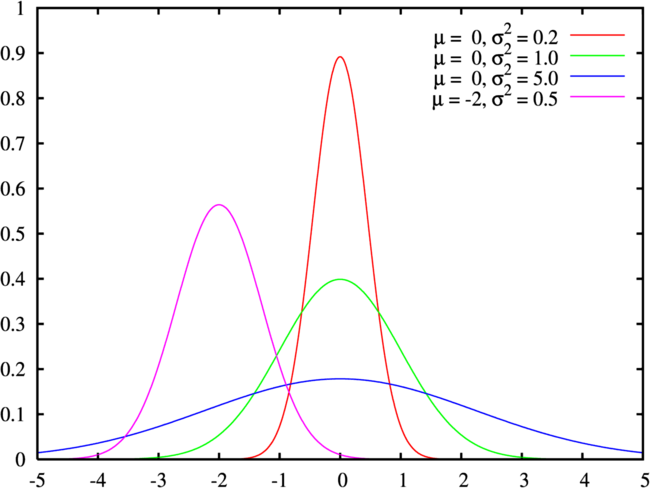

#### Распределение Паретто

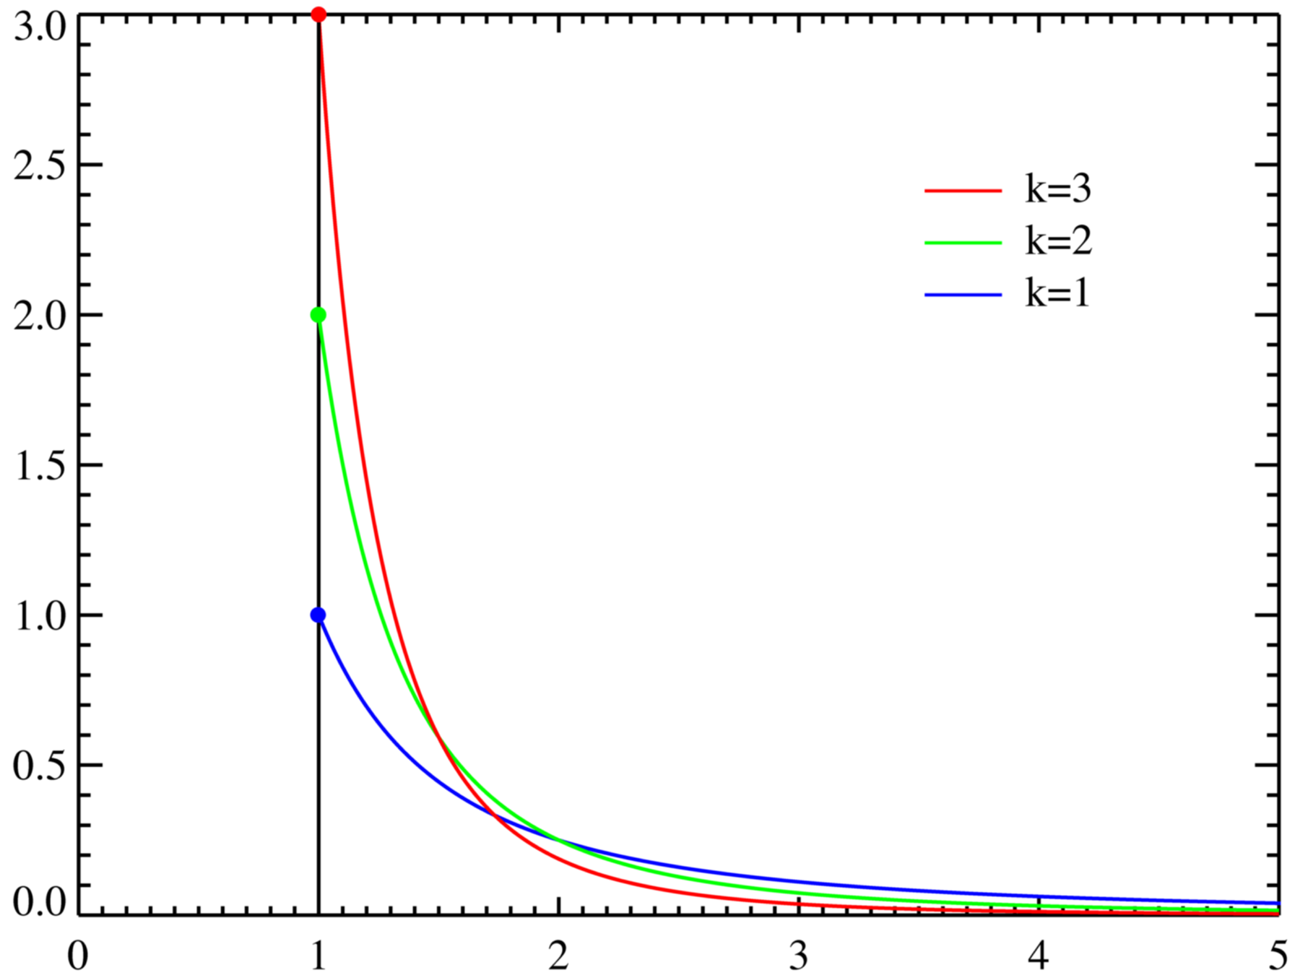

#### Полукруговое распределение Вигнера

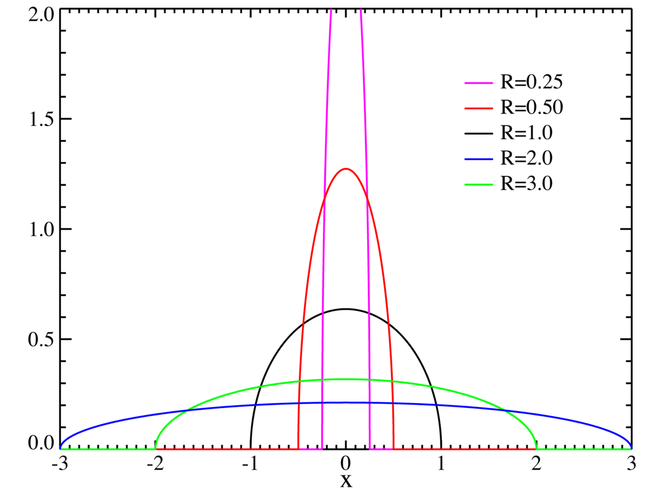

## Определения



**Функция распределения** -- это функция, которая характеризует распределение случайной величины. Она отражает вероятность того, что случайная величина примет значение, меньшее или равное определённому числу.

**Функция вероятности** -- это функция, которая описывает вероятность того, что дискретная случайная величина примет определённое значение.

**Функция плотности вероятности** -- это функция, которая описывает вероятность того, что непрерывная случайная величина примет определенное значение. То есть, функция плотности вероятности является аналогом функции вероятности, но для непрерывных величин.

# Генерация графиков распределений

###### Преамбула

In [1]:
import shutil
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

# кол-во генерируемых картинок для каждого класса
m = 1000

In [3]:
path = '/content/drive/MyDrive/graphs'

### Дискретные

In [ ]:
def save_plot(x, y, name, ind, is_fill=0, xmin=0, xmax=0, ylim=1):
    """
    Отрисовка и сохранение графика в папку
    """
    plt.ylim((None, ylim))
    if is_fill:
        plt.xlim((xmin, xmax))
        plt.plot(x, y, color='green')
        plt.fill_between(x, y, color='green')
    else:
        plt.bar(x, y, color='green')

    plt.savefig(f"{path}/{name}_{ind + 1}.jpg")
    plt.show()
    plt.close()

#### Биномиальное распределение

  0%|          | 0/1 [00:00<?, ?it/s]

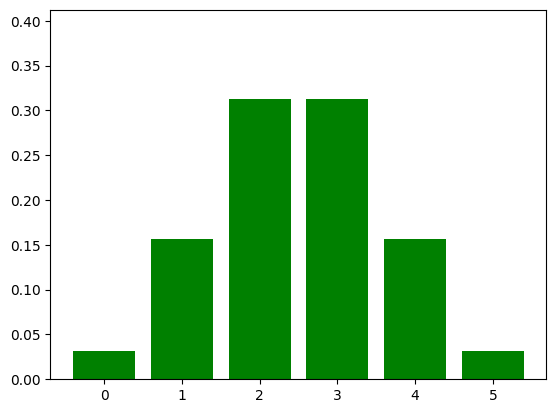

100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


In [ ]:
for i in tqdm(range(m)):
    # кол-во испытаний
    n = np.random.randint(low=1, high=50)
    # кол-во успехов
    x = np.arange(n + 1)
    # вероятность успеха
    p = np.random.random(1)[0]

    rv = sps.binom(n, p)
    y = rv.pmf(x)

    save_plot(x, y, 'binom', i, ylim=max(y) + 0.1)

#### Геометрическое распределение

  0%|          | 0/1 [00:00<?, ?it/s]

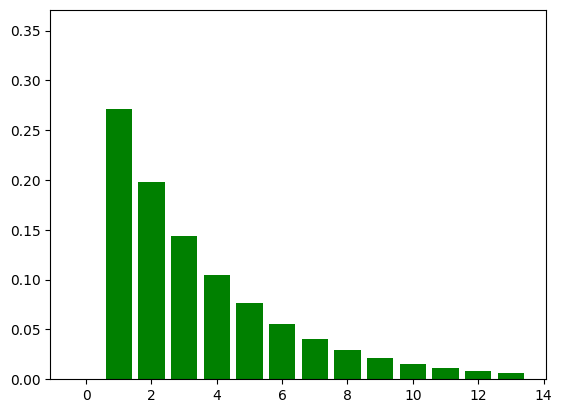

100%|██████████| 1/1 [00:00<00:00,  3.67it/s]


In [ ]:
for i in tqdm(range(m)):
    n = np.random.randint(low=1, high=50)
    # на каком испытании успех
    x = np.arange(n + 1)
    # вероятность одного успеха
    p = np.random.random(1)[0]

    rv = sps.geom(p)
    y = rv.pmf(x)

    save_plot(x, y, 'geom', i, ylim=max(y) + 0.1)

#### Распределение Пуассона

  0%|          | 0/1 [00:00<?, ?it/s]

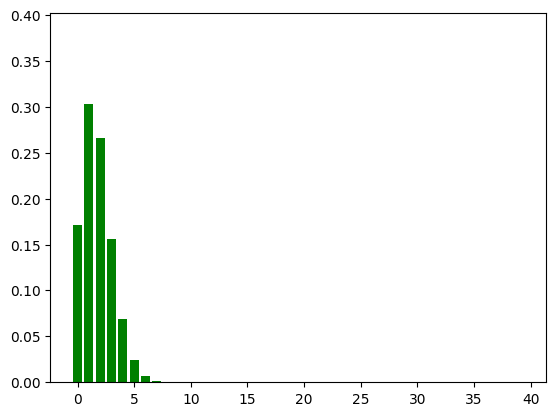

100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


In [ ]:
for i in tqdm(range(m)):
    # число событий
    n = np.random.randint(low=1, high=50)
    # кол-во событий
    x = np.arange(n + 1)
    # параметр распределения
    lam = np.random.uniform(low=1, high=3)

    rv = sps.poisson(lam)
    y = rv.pmf(x)

    save_plot(x, y, 'poisson', i, ylim=max(y) + 0.1)

### Непрерывные

#### Нормальное распределение

  0%|          | 0/1 [00:00<?, ?it/s]

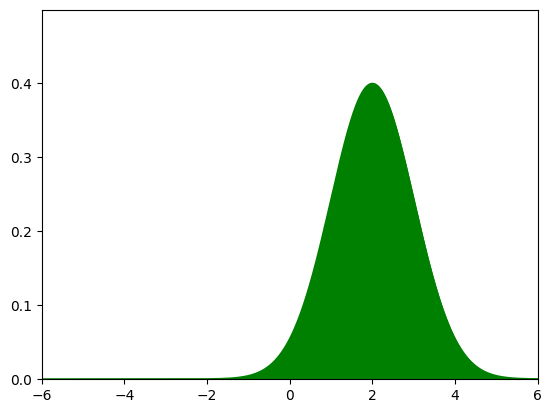

100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


In [ ]:
for i in tqdm(range(m)):
    x1 = np.random.randint(2, 20)
    # среднее
    mu = np.random.randint(-x1 // 2, x1 // 2)
    # на каком отрезке сторим
    x = np.linspace(-x1, x1, 1000)

    rv = sps.norm(mu)
    y = rv.pdf(x)

    save_plot(x, y, 'norm', i, 1, -x1, x1, ylim=max(y) + 0.1)

#### Парето распределение

  0%|          | 0/1 [00:00<?, ?it/s]

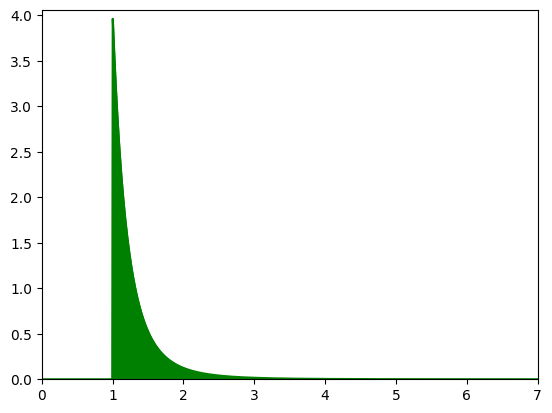

100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


In [ ]:
for i in tqdm(range(m)):
    k = np.random.randint(1, 5)
    x1 = np.random.randint(1, 10)
    # на каком отрезке сторим
    x = np.linspace(0, x1, 1000)

    rv = sps.pareto(k)
    y = rv.pdf(x)

    save_plot(x, y, 'pareto', i, 1, 0, x1, ylim=max(y) + 0.1)

#### Полукруговое распределение Вигнера

In [ ]:
class vigner_gen(sps.rv_continuous):
    def _pdf(self, x, R):
        return 2 / (np.pi * R**2) * np.sqrt(R**2 - x**2)

  0%|          | 0/1 [00:00<?, ?it/s]

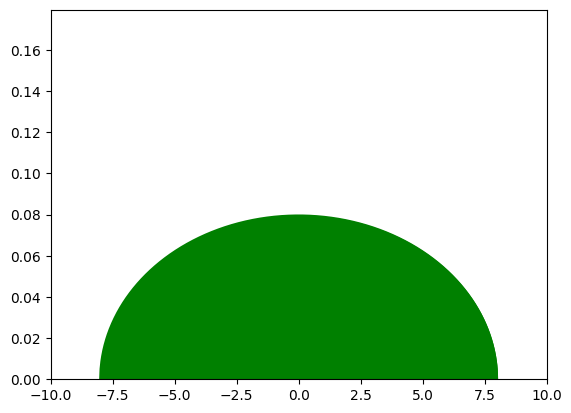

100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


In [ ]:
for i in tqdm(range(m)):
    # на каком отрезке сторим
    x1 = np.random.randint(1, 10)
    x = np.linspace(-x1, x1, 1000)

    vigner = vigner_gen()
    rv = vigner(x1)
    y = rv.pdf(x)

    save_plot(x, y, 'vigner', i, 1, -10, 10, ylim=max(y) + 0.1)

In [ ]:
files = '/content/drive/MyDrive/graphs'
shutil.make_archive(files, 'zip', files)

'/content/drive/MyDrive/graphs.zip'